# VegetableCNN 

> Development of a VEGETABLE Image Classifier using CNN

## Revision History 

- yyyy/mm/dd Activity 

## Step 1. Install Dependencies 

> Install the required third-party libraries. 

In [32]:
%pip install -U jupyterlab 
%pip install -U notebook 
%pip install -U pandas 
%pip install -U opencv-python  
%pip install -U scikit-learn 
%pip install -U scikit-image 
%pip install -U matplotlib 
%pip install -U pillow 
%pip install -U seaborn 
%pip install -U tensorflow 
%pip install -U tabulate 
print("Environment is ready...") 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Environment is ready...


## Step 2: Import the Packages 
 
> Import all third-party libraries necessary for the CNN model to execute successfully.

In [33]:
import os 
 
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0" 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" 
 
import glob 
import json 
import time 
import warnings 
from datetime import datetime 
 
warnings.filterwarnings("ignore", category=RuntimeWarning, message="os.fork()") 
warnings.filterwarnings("ignore", category=UserWarning, message="Your `PyDataset` class should call") 
 
import cv2 
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.models import Sequential, load_model
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import ( 
    Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense 
) 
from tensorflow.keras.optimizers import Adadelta 
 
gpus = tf.config.list_physical_devices("GPU") 
 
if gpus: 
    try: 
        for gpu in gpus: 
            tf.config.experimental.set_memory_growth(gpu, True) 
    except RuntimeError as e: 
            print(e) 
    print("GPU detected. Running on GPU.") 
else: 
    print("No GPU detected. Running on CPU.")

No GPU detected. Running on CPU.


## Step 3: Load Datasets 
 
> Load and prepare the training, validation, and testing datasets.

In [34]:
DATA_DIR = "data"
IMAGE_SIZE = 224
IMAGE_CHANNELS = 3

BATCH_SIZE = 8

all_images = glob.glob(f"{DATA_DIR}/*/*.jpg")
df = pd.DataFrame({
    "filepath": all_images,
    "label": [os.path.basename(os.path.dirname(p)) for p in all_images]
})

train_val_df, test_df = train_test_split(df, test_size=0.1, stratify=df["label"], shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df["label"], shuffle=True)

generator1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_data = generator1.flow_from_dataframe(
    train_df, x_col="filepath", y_col="label", target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True
)

NUM_CLASSES = max(train_data.classes) + 1

generator2 = ImageDataGenerator(rescale=1./255)

val_data = generator2.flow_from_dataframe(
    val_df, x_col="filepath", y_col="label", target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True
)

test_data = generator2.flow_from_dataframe(
    test_df, x_col="filepath", y_col="label", target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=False
)

Found 104 validated image filenames belonging to 3 classes.
Found 26 validated image filenames belonging to 3 classes.
Found 15 validated image filenames belonging to 3 classes.


## Step 4: Define the Architecture 
 
> Define the structure of the CNN for VEGETABLE classification. 

In [35]:
model = Sequential() 
 
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))) 

model.add(Conv2D(32, (3, 3), activation="swish", padding="same")) 
model.add(Conv2D(32, (3, 3), activation="swish", padding="same")) 
model.add(Conv2D(32, (3, 3), activation="swish", padding="same")) 
model.add(MaxPooling2D((2, 2))) 

model.add(Conv2D(64, (3, 3), activation="swish", padding="same")) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.1)) 
 
model.add(Flatten()) 
model.add(Dense(32, activation="swish")) 
model.add(Dense(32, activation="swish")) 
model.add(Dropout(0.1)) 
 
model.add(Dense(NUM_CLASSES, activation="softmax")) 
 
optimizer = Adadelta(learning_rate=1.0, rho=0.95) 
model.compile(optimizer=optimizer, loss="categorical_crossentropy", 
metrics=["accuracy"]) 
 
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)             │ (None, 224, 224, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_9 (Conv2D)             │ (None, 224, 224, 32)  │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_10 (Conv2D)            │ (None, 224, 224, 32)  │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 112, 112, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_11 (Conv2D)            │ (None, 112, 112, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 56, 56, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 56, 56, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 200704)        │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_6 (Dense)               │ (None, 32)            │    6,422,560 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_7 (Dense)               │ (None, 32)            │        1,056 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_8 (Dense)               │ (None, 3)             │           99 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 6,461,603 (24.65 MB)

 Trainable params: 6,461,603 (24.65 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model   
 
> Feed the training-val dataset to the compiled CNN model. 

In [36]:
EPOCHS = 100
MODELS = "models" 
ANALYSIS = "analysis" 
ARCHITECTURE = "CNN"
 
os.makedirs(MODELS, exist_ok=True) 
os.makedirs(ANALYSIS, exist_ok=True) 
 
training_timestamp = int(time.time()) 
 
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS) 
 
training_duration = (int(time.time()) - training_timestamp) / 60 

fullpath = f"{MODELS}/topic.{ARCHITECTURE}_{training_timestamp}.keras" 
model.save(fullpath) 
 
with open(f"{ANALYSIS}/metrics_{training_timestamp}.json", "w") as f: 
    json.dump({ 
        "loss": history.history["loss"], 
        "accuracy": history.history["accuracy"], 
        "val_loss": history.history["val_loss"], 
        "val_accuracy": history.history["val_accuracy"] 
    }, f, indent=4) 
 
print(f"Training completed in {training_duration:.2f} minutes.") 
print(f"Metrics saved to '{ANALYSIS}/metrics_{training_timestamp}.json'") 
print(f"Model saved to '{fullpath}'") 

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5685 - loss: 1.1573 - val_accuracy: 0.3077 - val_loss: 1.0796
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4670 - loss: 1.0708 - val_accuracy: 0.5000 - val_loss: 0.9861
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4897 - loss: 1.0240 - val_accuracy: 0.5000 - val_loss: 0.9597
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4998 - loss: 1.0660 - val_accuracy: 0.5000 - val_loss: 0.9917
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5377 - loss: 0.9778 - val_accuracy: 0.5000 - val_loss: 1.0644
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4661 - loss: 1.0782 - val_accuracy: 0.5000 - val_loss: 1.0235
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5076 - loss: 1.0351 - val_accuracy: 0.5000 - val_loss: 0.9539
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5844 - loss: 0.8640 - val_accuracy: 0.5385 - v

## Step 6: Generate Training Analysis   
 
**Metrics Definitions**   

- Loss is computed based on how far each prediction is from the ground truth, 
specifically using Categorical Cross-entropy.
- Accuracy is the proportion of correct predictions to the total predictions. 

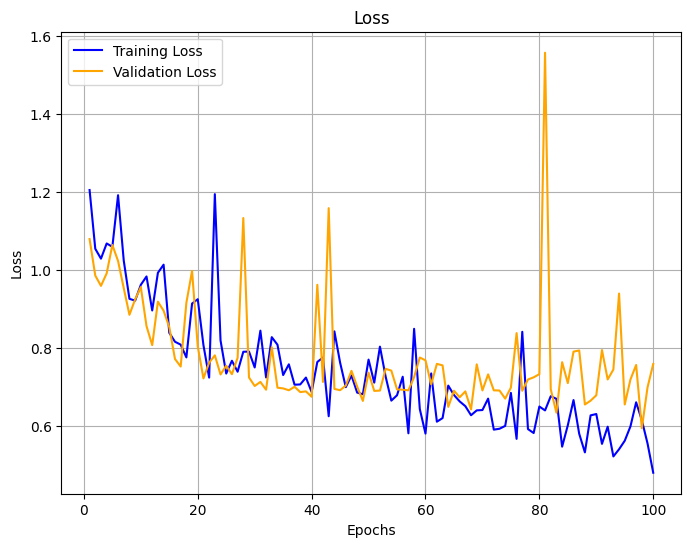

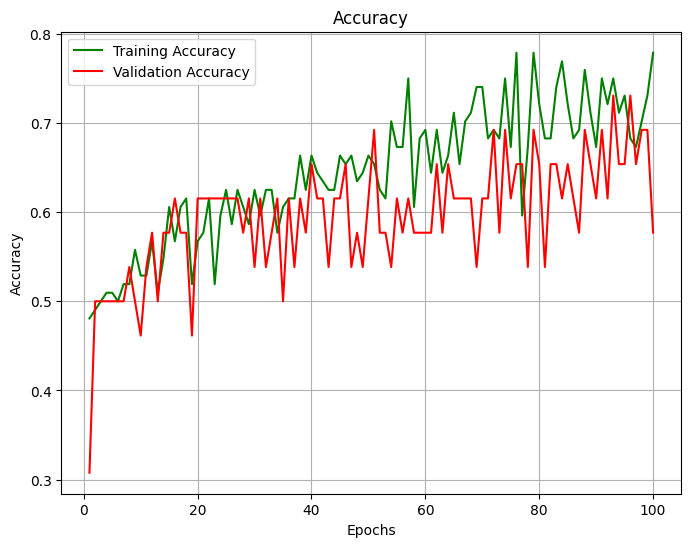


Plots saved to analysis directory.


In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt 
 
with open(f"{ANALYSIS}/metrics_{training_timestamp}.json", "r") as f: 
    metrics = json.load(f) 
 
epochs = [i for i in range(1, len(metrics["loss"])+1)] 
 
plt.figure(figsize=(8, 6)) 
sns.lineplot(x=epochs, y=metrics["loss"], label="Training Loss", color="blue") 
sns.lineplot(x=epochs, y=metrics["val_loss"], label="Validation Loss", color="orange") 
plt.title("Loss") 
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
plt.grid(True) 
plt.savefig(f"{ANALYSIS}/loss_plot_{training_timestamp}.png") 
plt.show() 

plt.figure(figsize=(8, 6)) 
sns.lineplot(x=epochs, y=metrics["accuracy"], label="Training Accuracy", color="green") 
sns.lineplot(x=epochs, y=metrics["val_accuracy"], label="Validation Accuracy", color="red") 
plt.title("Accuracy") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
plt.grid(True) 
plt.savefig(f"{ANALYSIS}/accuracy_plot_{training_timestamp}.png") 
plt.show() 
 
print(f"\nPlots saved to {ANALYSIS} directory.") 

## Step 7: Test the Model 
 
> Run the model using the test dataset.

In [38]:
start_time = time.time()
 
results = model.predict(test_data, verbose=1) 
 
prediction_duration = time.time() - start_time 
image_prediction_time = prediction_duration / test_data.samples 
 
predictions = (results > 0.5).astype("int32").flatten() if results.shape[1] == 1 else results.argmax(axis=1) 
 
print(f"Total prediction time: {prediction_duration:.4f} seconds") 
print(f"Time per image: {image_prediction_time:.4f} seconds") 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000249B8B19C60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step
Total prediction time: 1.3463 seconds
Time per image: 0.0898 seconds


## Step 8: Display the Results 
 
> Show the actual classes and predictions.

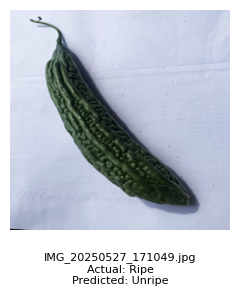

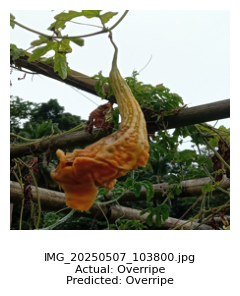

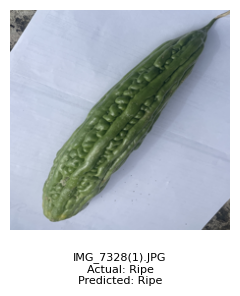

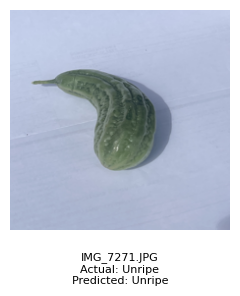

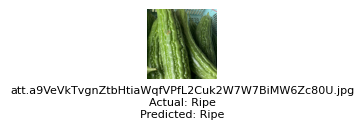

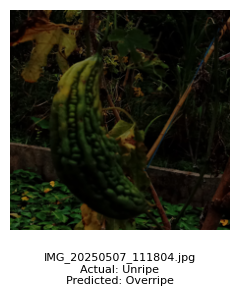

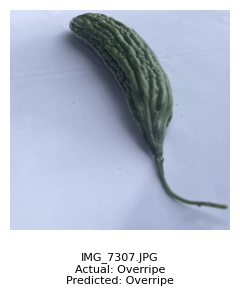

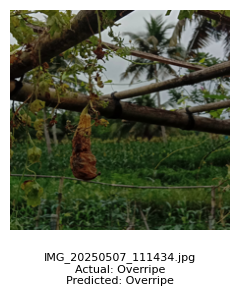

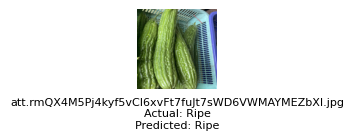

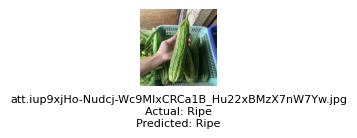

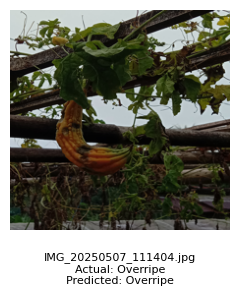

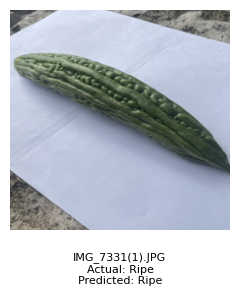

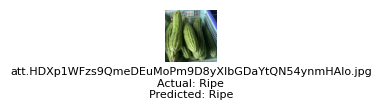

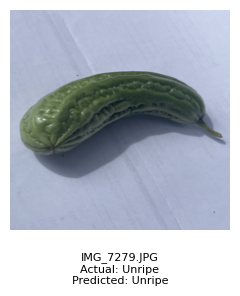

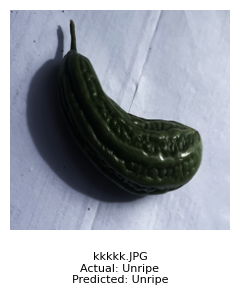

In [39]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from PIL import Image 

filepaths = test_data.filepaths
true_indices = test_data.classes 
class_labels = list(test_data.class_indices.keys()) 
 
for fp, true, pred in zip(filepaths, true_indices, predictions): 
    img = Image.open(fp).resize((224, 224)) 
 
    filename = os.path.basename(fp) 
    actual = class_labels[true].replace("-", " ").title() 
    predicted = class_labels[pred].replace("-", " ").title() 
     
    plt.figure(figsize=(2.5, 3)) 
    plt.imshow(img) 
    plt.axis('off') 
 
    text = f"{filename}\nActual: {actual}\nPredicted: {predicted}" 
    plt.text(0.5, -0.1, text, fontsize=8, ha="center", va="top", transform=plt.gca().transAxes) 
 
    plt.tight_layout() 
    plt.show() 

## Step 9: Confusion Matrix with Cohen's Kappa Score Analysis 
 
> The ideal matrix is a left-to-right diagonal; however, the Cohen's Kappa score is 
calculated to quantify the results. 

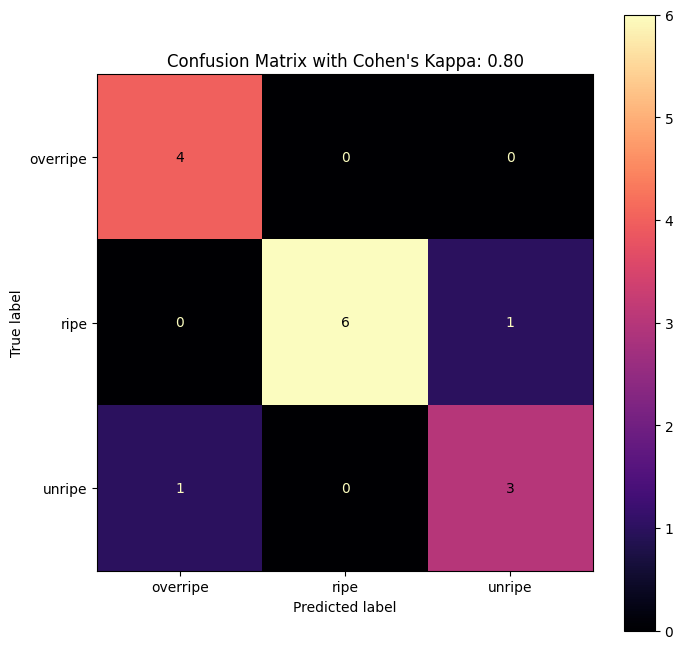

Interpretation of Kappa Score: Substantial agreement


In [40]:
from sklearn.metrics import ( 
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score 
) 
 
 
 
cm = confusion_matrix(true_indices, predictions) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels) 
kappa_score = cohen_kappa_score(true_indices, predictions) 
 
fig, ax = plt.subplots(figsize=(8, 8))

disp.plot(cmap="magma", ax=ax) 
 
plt.title(f"Confusion Matrix with Cohen's Kappa: {kappa_score:.2f}") 
plt.savefig(f"{ANALYSIS}/confusion-matrix_{training_timestamp}.png") 
plt.show() 
 
# Landis & Koch (1977) scale 
kappa_scale = { 
    (-1.0, 0.00): "Poor agreement", 
    (0.00, 0.20): "Slight agreement", 
    (0.21, 0.40): "Fair agreement", 
    (0.41, 0.60): "Moderate agreement", 
    (0.61, 0.80): "Substantial agreement", 
    (0.81, 1.00): "Almost perfect agreement" 
} 
 
for interval, label in kappa_scale.items(): 
    if interval[0] < kappa_score <= interval[1]: 
        print(f"Interpretation of Kappa Score: {label}") 
        break 

--- 
End code. 